# Dogs and cats

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image
import requests
from io import BytesIO

In [2]:
# Initialize
path = Path('/home/jupyter/.fastai/data/oxford-iiit-pet')
path_img = path/'images'
file_names = get_image_files(path_img)
pattern = r'/([^/]+)_\d+.jpg$'
np.random.seed(314)

In [ ]:
path_img.ls()

## resnet34

In [3]:
# Data preparation
data = ImageDataBunch.from_name_re(path_img, file_names, pattern, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'jack_russel_terrier', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


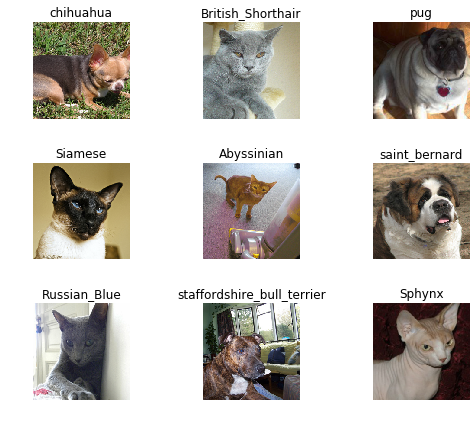

In [4]:
# Check data
print(data.classes)
data.show_batch(rows=3, figsize=(7,6))

In [5]:
# Select model
learn = cnn_learner(data, models.resnet34, pretrained=True, metrics=accuracy)
# learn.model

In [6]:
# train resnet34
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.435427,0.335611,0.900527,00:42
1,0.560007,0.254617,0.916996,00:33
2,0.340782,0.212690,0.931489,00:33
3,0.257789,0.201543,0.930830,00:34


## resnet50

In [31]:
data = ImageDataBunch.from_name_re(path_img, file_names, pattern, ds_tfms=get_transforms(),
                                   size=299, bs=32).normalize(imagenet_stats)
learn2 = cnn_learner(data, models.resnet50, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


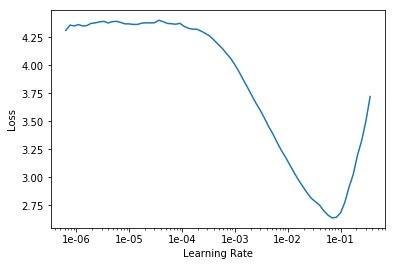

In [32]:
learn2.lr_find()
learn2.recorder.plot()

In [33]:
# Retrain resnet 50
learn2.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.659248,0.243967,0.923584,01:55
1,0.392728,0.202579,0.935441,01:56
2,0.278973,0.172664,0.942029,01:55
3,0.192715,0.142807,0.955863,01:56
4,0.143419,0.142008,0.952569,01:56


In [45]:
# Save/load status
learn2.save('res50')
# learn2.load('res50')

Learner(data=ImageDataBunch;

Train: LabelList (6072 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
wheaten_terrier,beagle,yorkshire_terrier,British_Shorthair,Maine_Coon
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1518 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Abyssinian,german_shorthaired,Bombay,pomeranian,Maine_Coon
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, 

In [39]:
# Fine tuning
learn2.unfreeze()
learn2.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.134028,0.148613,0.948617,02:32
1,0.110831,0.136103,0.954545,02:33


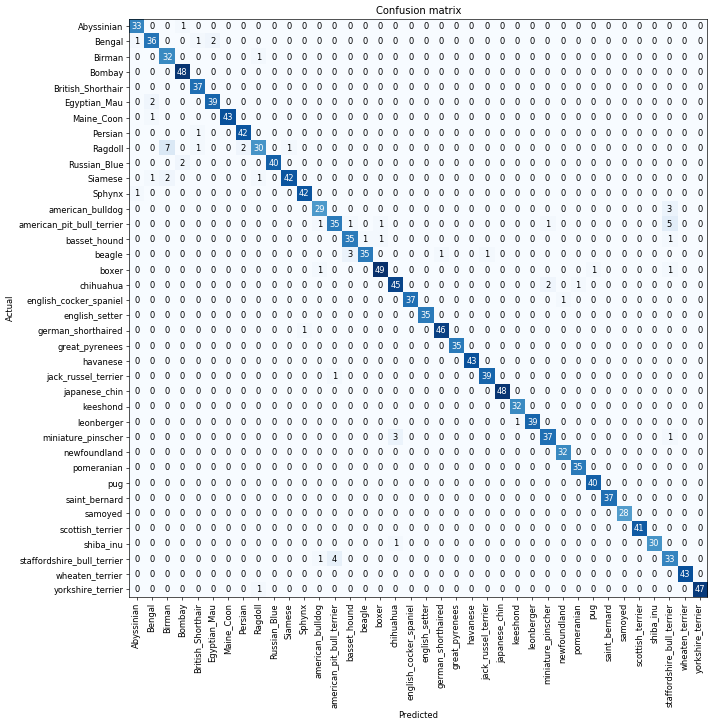

In [45]:
# Check model results
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [46]:
interp.most_confused(min_val=3)

[('Ragdoll', 'Birman', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('beagle', 'basset_hound', 3),
 ('miniature_pinscher', 'chihuahua', 3)]

In [47]:
# Save/load model from disk
learn2.export()
# learn2 = load_learner(path_img)

## Use model for predictions

In [7]:
# Download image from url and convert
url = 'https://i.imgur.com/mVrTdJk.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.convert('RGB').save('image.jpg')

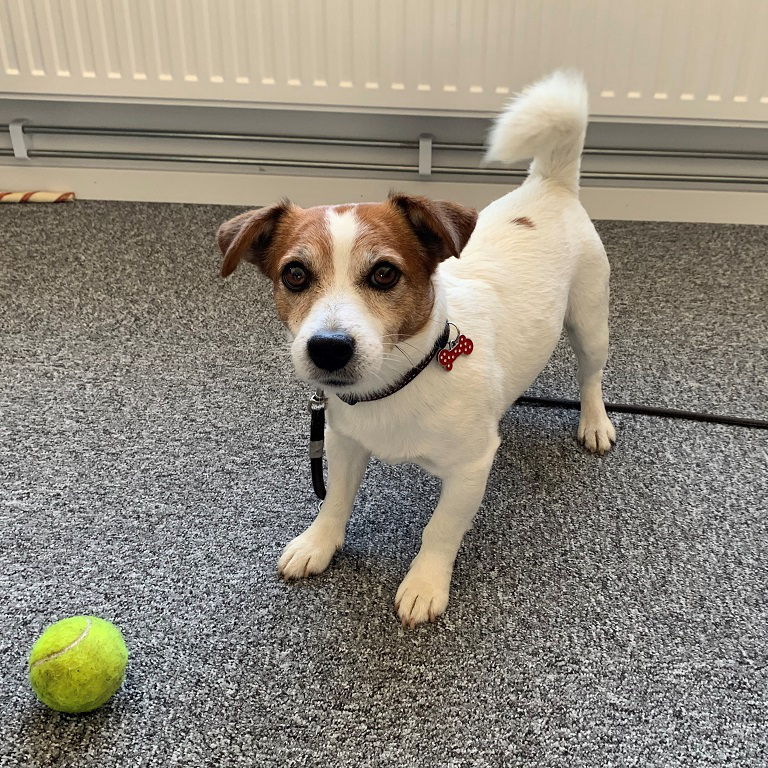

In [12]:
# Load and show image
image_file = open_image('Vigo.jpg')
image_file

In [13]:
pred_class, pred_idx, outputs = learn.predict(image_file)
pred_class

Category jack_russel_terrier

In [14]:
# Show output values of neural network
print(len(outputs))
values = [float(out) for out in outputs]
list(zip(data.classes, values))

38


[('Abyssinian', 2.1882678993279114e-05),
 ('Bengal', 6.486613528977614e-06),
 ('Birman', 0.00012006160250166431),
 ('Bombay', 6.183283403515816e-05),
 ('British_Shorthair', 1.677660839050077e-05),
 ('Egyptian_Mau', 6.780056082789088e-06),
 ('Maine_Coon', 3.309171734144911e-05),
 ('Persian', 9.953964763553813e-06),
 ('Ragdoll', 0.00010403127816971391),
 ('Russian_Blue', 7.983093382790685e-06),
 ('Siamese', 5.050626350566745e-05),
 ('Sphynx', 3.79889715986792e-05),
 ('american_bulldog', 0.001648519653826952),
 ('american_pit_bull_terrier', 0.000729649793356657),
 ('basset_hound', 0.0005733139114454389),
 ('beagle', 0.15052086114883423),
 ('boxer', 6.171465793158859e-05),
 ('chihuahua', 0.0003138190950267017),
 ('english_cocker_spaniel', 0.0001553077163407579),
 ('english_setter', 0.00013599962403532118),
 ('german_shorthaired', 0.0011872515315189958),
 ('great_pyrenees', 0.0006677192868664861),
 ('havanese', 0.0007655343506485224),
 ('jack_russel_terrier', 0.839638888835907),
 ('japanese